In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sns

In [2]:
DATA_PATH = 'data/data.csv'
PRODUCTS_PATH = 'data/products.csv'

In [3]:
pd.set_option('display.max_columns', 57)

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 80
plt.rcParams['axes.facecolor'] = 'FFFFFF'
plt.rcParams['legend.facecolor'] = 'FFFFFF'
# figure().patch.set_facecolor('white')

In [4]:
data =  pd.read_csv(DATA_PATH, sep=',', parse_dates=['doc_date', 'created_at'], low_memory=False)
data.head()

,order_price_without_vat,order_price_with_vat,bill_country,setting_currency_id,created_at,shop_basket_id,doc_date,exchange_currency_rate,source,canceled_date,currency_code,currency_symbol,price_round_system,basket_total_price_before_discount_with_vat,basket_total_price_with_vat,count_basket_items,basket_count_products,basket_type,item_quantity,item_type,item_unit_price_with_vat,item_unit_price_without_vat,item_total_discount_with_vat,product_id,product_code,catalog_category_id,catalog_brand_id,product_name,product_status,reviews_count,reviews_average_score_price,reviews_average_score_quality,reviews_average_score_properties,reviews_average_score_overall,reviews_average_score,is_in_stock,is_ended,is_new,is_boosted,product_purchase_price,eshop_stock_count,is_fifo,product_name_parameterize,category,tree_path,category_name_parameterized,category_status,catalog_segment_id,categories_ancestor_ids,categories_descendant_ids,category_full_name_path,default_warranty_period,brand_name,brand_parameterized,segment_name,segment_parameterezied,segment_status
0,562.29,674.75,BG,1,2020-04-26 19:25:20.842503,1136409,2020-04-26,1.9558,eshop,NaN,BGN,лв,0,759.0,674.75,18,18,standard,1,standard,10.45,8.70833,0.55,39848,225542,179.0,145,MC-2,active,83,95.192308,93.653846,93.653846,94.423077,94.277108,t,f,f,f,2.205000,-2.0,f,mc-2,Kapodastre pre gitaru s kovovými strunami,001:001:019:001,kapodastre-pre-gitaru-s-kovovymi-strunami,active,1.0,"{3,4,178}",{},"{Music,Guitars,Capos,""Capo for acoustic guitar""}",24.0,Musedo,musedo,Music,music,active
1,562.29,674.75,BG,1,2020-04-26 19:25:20.842503,1136409,2020-04-26,1.9558,eshop,NaN,BGN,лв,0,759.0,674.75,18,18,standard,1,standard,5.70,4.75000,0.30,140119,305503,762.0,109,TGC026 1m,active,1,0.000000,0.000000,0.000000,0.000000,100.000000,f,f,f,f,1.385000,0.0,f,tgc026-1m,Hotové nástrojové káble,001:005:010:001:001,hotove-nastrojove-kable,active,1.0,"{3,607,760,761}",{},"{Music,""Studio / PA"",Cables,""Complete Cables"",...",24.0,Lewitz,lewitz,Music,music,active
2,562.29,674.75,BG,1,2020-04-26 19:25:20.842503,1136409,2020-04-26,1.9558,eshop,NaN,BGN,лв,0,759.0,674.75,18,18,standard,1,standard,0.95,0.79167,0.05,34663,220357,153.0,13,351 Shape Premium Pick Medium White Moto,active,46,92.258065,93.225806,94.516129,94.193548,94.804348,t,f,f,f,0.164984,303.0,f,351-shape-premium-pick-medium-white-moto,Medium trsátka,001:001:015:002,medium-trsatka,active,1.0,"{3,4,151}",{},"{Music,Guitars,""Guitar Picks"",""Medium Picks""}",24.0,Fender,fender,Music,music,active
3,562.29,674.75,BG,1,2020-04-26 19:25:20.842503,1136409,2020-04-26,1.9558,eshop,NaN,BGN,лв,0,759.0,674.75,18,18,standard,1,standard,9.50,7.91667,0.50,63176,248871,192.0,320,536501 Foot Rest Blue,active,10,92.500000,87.500000,92.500000,90.000000,92.500000,t,f,f,f,3.243455,55.0,f,536501-foot-rest-blue,Gitarové podnožky,001:001:024,gitarove-podnozky,active,1.0,"{3,4}",{},"{Music,Guitars,""Guitar Foot Rest""}",24.0,GEWA,gewa,Music,music,active
4,562.29,674.75,BG,1,2020-04-26 19:25:20.842503,1136409,2020-04-26,1.9558,eshop,NaN,BGN,лв,0,759.0,674.75,18,18,standard,1,standard,0.95,0.79167,0.05,51524,237219,152.0,6,BPK-72-AT Celluloid Pick Thin Abalone,active,0,0.000000,0.000000,0.000000,0.000000,0.000000,t,t,f,f,0.138880,0.0,f,bpk-72-at-celluloid-pick-thin-abalone,Light trsátka,001:001:015:001,light-trsatka,active,1.0,"{3,4,151}",{},"{Music,Guitars,""Guitar Picks"",""Light Picks""}",24.0,Boss,boss,Music,music,active


In [5]:
products = pd.read_csv(PRODUCTS_PATH, sep=',')
products.head()

,variant_id,category_id,brand_id,status,is_new,reviews_count,reviews_average_score_price,reviews_average_score_quality,reviews_average_score_properties,reviews_average_score_overall,in_sets_count,is_in_stock,is_returnable,purchase_price,eshop_stock_count,country_of_origin_code,name
0,353734,3495.0,7808.0,draft,f,0,0.0,0.0,0.0,0.0,0,t,f,65.33333,0.0,GB,Stereoizer
1,241263,1203.0,1390.0,active,f,0,0.0,0.0,0.0,0.0,0,f,t,293.97000,0.0,UA,Sport Pro Leather Jacket Black/White 48
2,25632,332.0,32.0,ended,f,0,0.0,0.0,0.0,0.0,0,f,t,NaN,0.0,JP,WJ336300
3,25633,196.0,107.0,ended,f,0,0.0,0.0,0.0,0.0,0,f,t,NaN,0.0,NaN,Vintage Gold
4,311334,NaN,2.0,draft,f,0,0.0,0.0,0.0,0.0,0,f,t,NaN,0.0,NaN,(B-Stock) #947558


In [6]:
data.dtypes

order_price_without_vat                               float64
order_price_with_vat                                  float64
bill_country                                           object
setting_currency_id                                     int64
created_at                                     datetime64[ns]
shop_basket_id                                          int64
doc_date                                       datetime64[ns]
exchange_currency_rate                                float64
source                                                 object
canceled_date                                          object
currency_code                                          object
currency_symbol                                        object
price_round_system                                      int64
basket_total_price_before_discount_with_vat           float64
basket_total_price_with_vat                           float64
count_basket_items                                      int64
basket_c

In [7]:
products.dtypes

variant_id                            int64
category_id                         float64
brand_id                            float64
status                               object
is_new                               object
reviews_count                         int64
reviews_average_score_price         float64
reviews_average_score_quality       float64
reviews_average_score_properties    float64
reviews_average_score_overall       float64
in_sets_count                         int64
is_in_stock                          object
is_returnable                        object
purchase_price                      float64
eshop_stock_count                   float64
country_of_origin_code               object
name                                 object
dtype: object

In [8]:
data.shape

(3661847, 57)

In [9]:
products.shape

(352491, 17)

# Clearing data

## **Data.csv insights**

We are looking into graphs below. \
Value distribution in columns is usually normalized, which means every value is in the range of <0,1> and sum of those values equals 1 or alternatively are shown in percentage.

In [10]:
def create_others_value_counts(threshold : float, df : pd.DataFrame, column_name : str) -> pd.Series:
    """
    Function which groups all of the values under threshold into 'others' with preserving of original categories
    Args
        threshold - float in range <0,1> as a threshold for key to be marked as others (desired percentage / 100)
        df - desired DataFrame containing given column
        column_name - string with the exact name of a desired Series
    Returns
        pd.Series - returns Series with the new 'others' group
    """
    
    over_thr = df[column_name].value_counts(normalize=True).loc[lambda x : x > threshold]
    under_thr = df[column_name].value_counts(normalize=True).loc[lambda x : x <= threshold]
    merged_series =  pd.concat([over_thr, pd.Series(under_thr.sum(), index=['others'])])
    return merged_series

In [11]:
data.isnull().sum()

order_price_without_vat                              0
order_price_with_vat                                 0
bill_country                                         0
setting_currency_id                                  0
created_at                                           0
shop_basket_id                                       0
doc_date                                            76
exchange_currency_rate                               0
source                                               0
canceled_date                                  3496480
currency_code                                        0
currency_symbol                                      0
price_round_system                                   0
basket_total_price_before_discount_with_vat          0
basket_total_price_with_vat                          0
count_basket_items                                   0
basket_count_products                                0
basket_type                                          0
item_quant

In [12]:
# If canceled_date is NOT na then the order was canceled and we don't want to have it in data
# We are only keeping NaN canceled dates and then deleting this column (full of nans now)
data = data[data.canceled_date.isna()]
data.drop('canceled_date', inplace=True, axis=1)

In [13]:
data.basket_type.unique()

array(['standard', 'internal', 'express_checkout'], dtype=object)

In [14]:
# Dropping all other NaNs from the data dataframe, since they are in important columns
data.dropna(inplace=True)

In [15]:
products.isnull().sum()

variant_id                              0
category_id                          6992
brand_id                                2
status                                  0
is_new                                  0
reviews_count                           0
reviews_average_score_price             0
reviews_average_score_quality           0
reviews_average_score_properties        0
reviews_average_score_overall           0
in_sets_count                           0
is_in_stock                             0
is_returnable                           0
purchase_price                      52741
eshop_stock_count                       0
country_of_origin_code              16023
name                                    1
dtype: int64

In [16]:
print(data.source.unique())
# There is only one value in source column, so that coulumn can be dropped as well
data.drop('source', inplace=True, axis=1)

['eshop']


## Item types

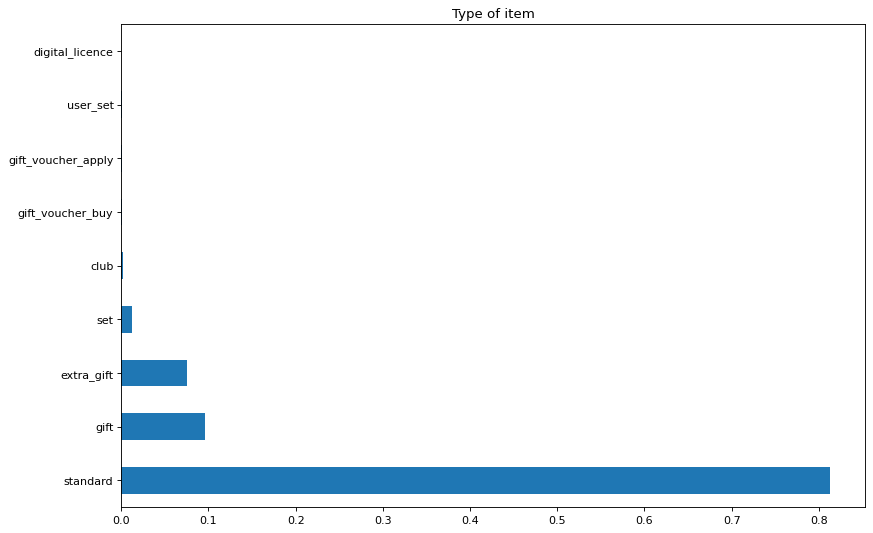

In [17]:
figure().patch.set_facecolor('white')
data.item_type.value_counts(normalize=True).plot(kind='barh', title='Type of item')
plt.show()

In [18]:
# We want to drop gifts as well as extra_gifts from orders, as they would mess up with machine learning (price of gifted product is usually 0)
# We are dropping club purchases for the same reason - those are gifts in a way, not necessarily purchases for money, so price is 0 again

print(data[data.item_type == 'gift'].sort_values(by='item_unit_price_with_vat', ascending=False).item_unit_price_with_vat)

data = data[data.item_type != 'gift']
data = data[data.item_type != 'extra_gift']
data = data[data.item_type != 'club']

# Voucher buys and applies are dropped as well, since those are only other ways of payment method, not products 
data = data[data.item_type != 'gift_voucher_buy']
data = data[data.item_type != 'gift_voucher_apply']

# Merge set and user set, they work on the same principle
data.item_type.replace('user_set', 'set', inplace=True)

2953       0.0
2312488    0.0
2312507    0.0
2312506    0.0
2312505    0.0
          ... 
954402     0.0
954401     0.0
954399     0.0
954398     0.0
3658573    0.0
Name: item_unit_price_with_vat, Length: 335240, dtype: float64


In [19]:
# We have only three types of items remaining now - standard, set and digital licence
data.item_type.value_counts(normalize=True)

standard           0.984074
set                0.015883
digital_licence    0.000043
Name: item_type, dtype: float64

## Basket types

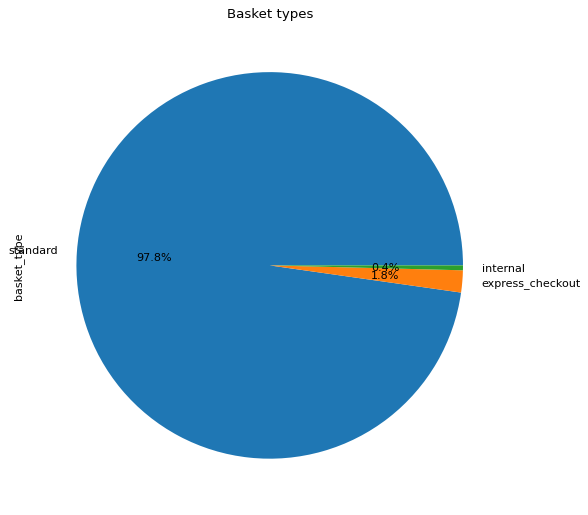

In [20]:
# Three different basket types. All of them are valid, made by customer - internal means some internal change (after the order was accepted) made thanks to user's request
figure().patch.set_facecolor('white')
data.basket_type.value_counts().plot(kind='pie', title='Basket types', autopct='%1.1f%%')
plt.show()

## Currency
We would like to see what currency was the most used. All values are now in EURos, but original currencies are still saved in the DataFrame

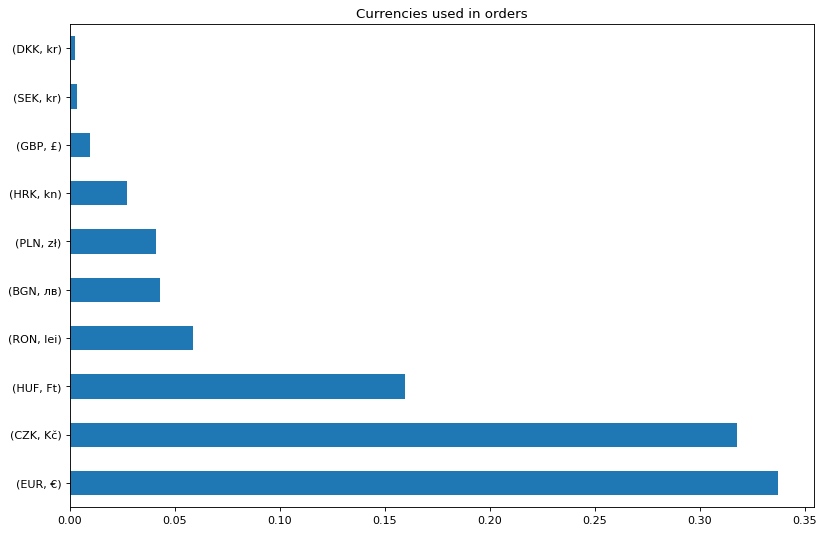

In [21]:
data[['currency_code', 'currency_symbol']].value_counts(normalize=True).plot(kind='barh', title='Currencies used in orders', xlabel='')
plt.show()

In [22]:
# Change all prices to EUR so we can easily compare them, this is one time operation 
non_eur_columns = ['order_price_without_vat', 'order_price_with_vat', 'basket_total_price_before_discount_with_vat', 
                   'basket_total_price_with_vat', 'item_unit_price_with_vat', 'item_unit_price_without_vat', 'item_total_discount_with_vat']

for column_name in non_eur_columns:
    data[column_name] =  round(data[column_name] / data.exchange_currency_rate, 2)

In [23]:
# Rename currency code column so it's clear they (original currencies) are not in use anymore
data.rename(columns={'currency_code': 'original_currency_code'}, inplace=True)

# Drop column that is not useful anymore 
data.drop('currency_symbol', inplace=True, axis=1)
data.drop('price_round_system', inplace=True, axis=1)

## More info about products

In [24]:
true_false_columns = ['is_in_stock', 'is_ended', 'is_new', 'is_boosted', 'is_fifo']
data.replace(['t', 'f'], [True, False], inplace=True)   # replace T/F with boolean values
data[true_false_columns]

,is_in_stock,is_ended,is_new,is_boosted,is_fifo
0,True,False,False,False,False
1,False,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,True,True,False,False,False
...,...,...,...,...,...
3661839,True,False,False,False,False
3661840,True,False,False,False,False
3661842,True,False,False,False,False
3661844,False,True,False,False,False


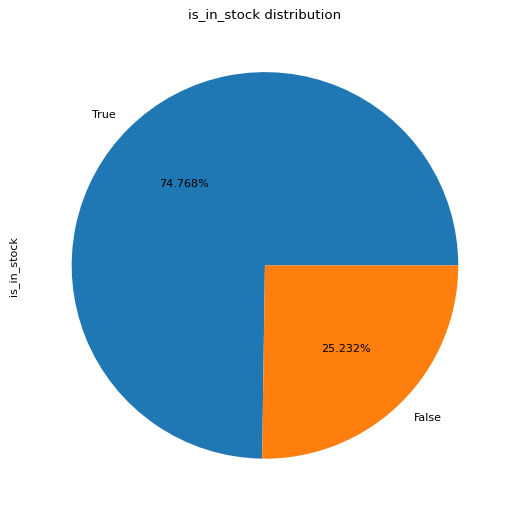

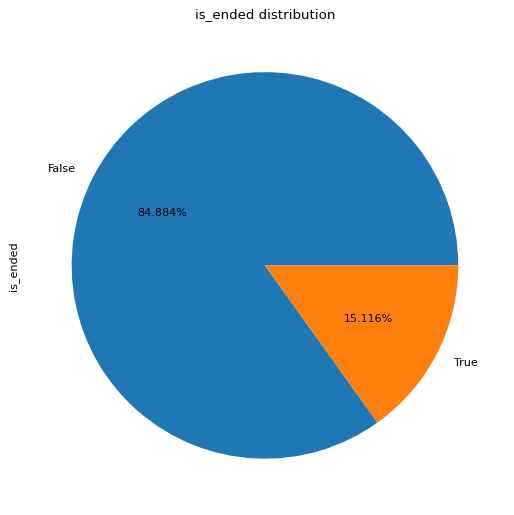

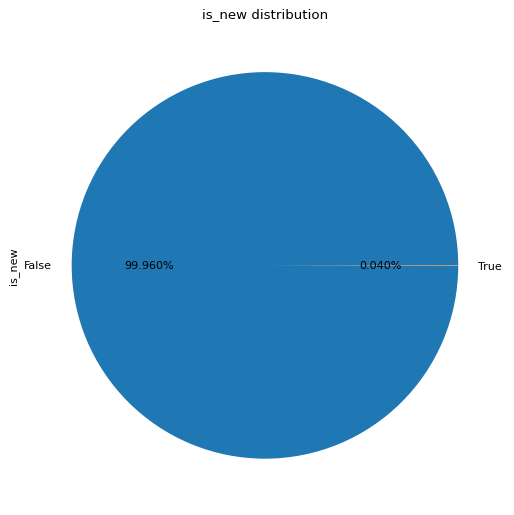

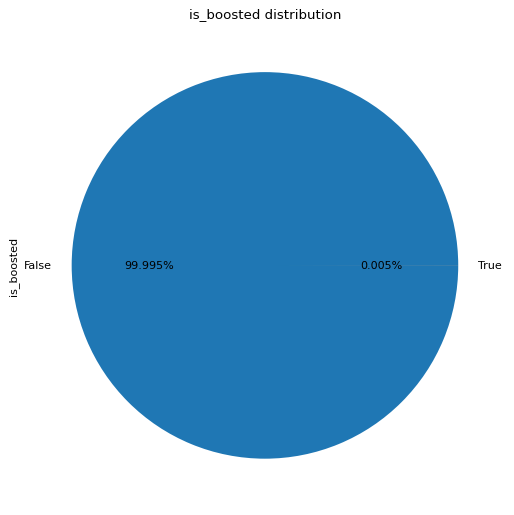

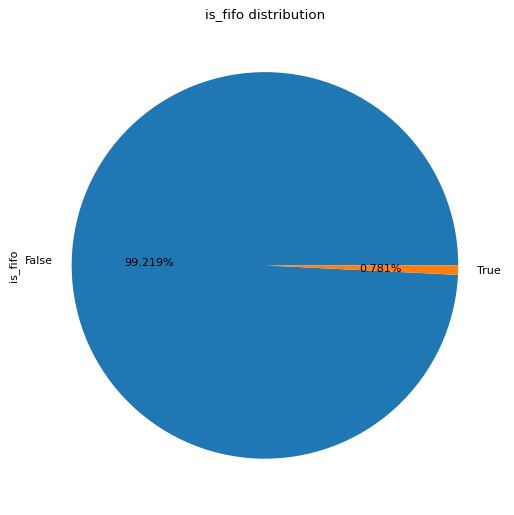

In [25]:
for col in true_false_columns:
    figure().patch.set_facecolor('white')
    data[col].value_counts().plot(kind='pie', title=f'{col} distribution', autopct='%1.3f%%')
    plt.show()

We can see several True/False information about products, which might be usefull in the future. 

For example we want to use ended product sales for model training, but not for evaluating the prediciton (as there are not new sales of ended products). \
Also FIFO products are important to note, as those are usually the products with shorter best before date. \
Boost and new are interesting as well, but there is probably too little amount of them to make significant difference (we will see later). 

### Reviews

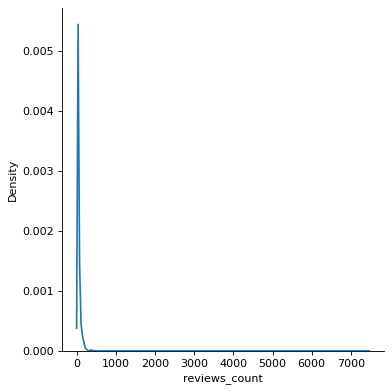

In [26]:
sns.displot(data.reviews_count, kind='kde')
plt.show()

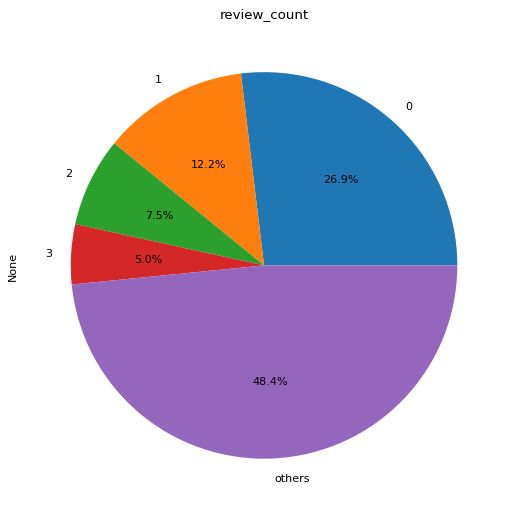

In [47]:
figure().patch.set_facecolor('white')
create_others_value_counts(0.05, data, 'reviews_count').plot(kind='pie', autopct='%1.1f%%', title='review_count')
plt.show()

<AxesSubplot:xlabel='reviews_count', ylabel='Density'>

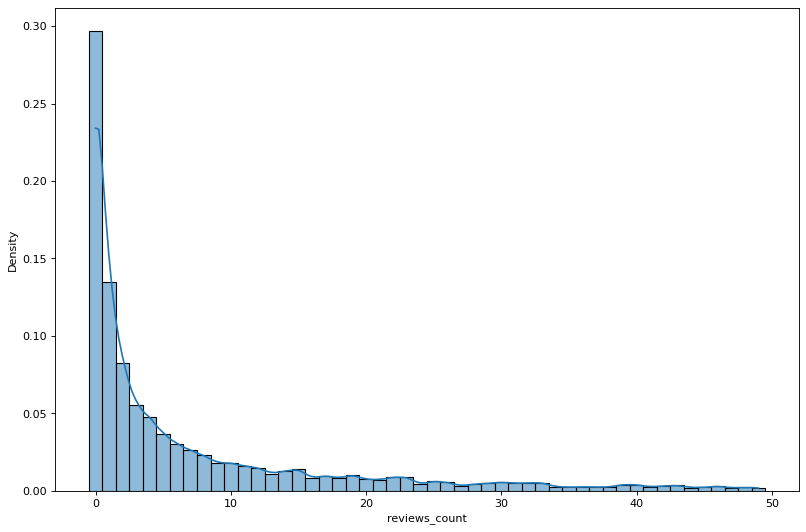

In [54]:
sns.histplot(data[data.reviews_count.__lt__(50)].reviews_count, kde=True, discrete=True, stat='density')
# Almost 30% of products got 0 reviews

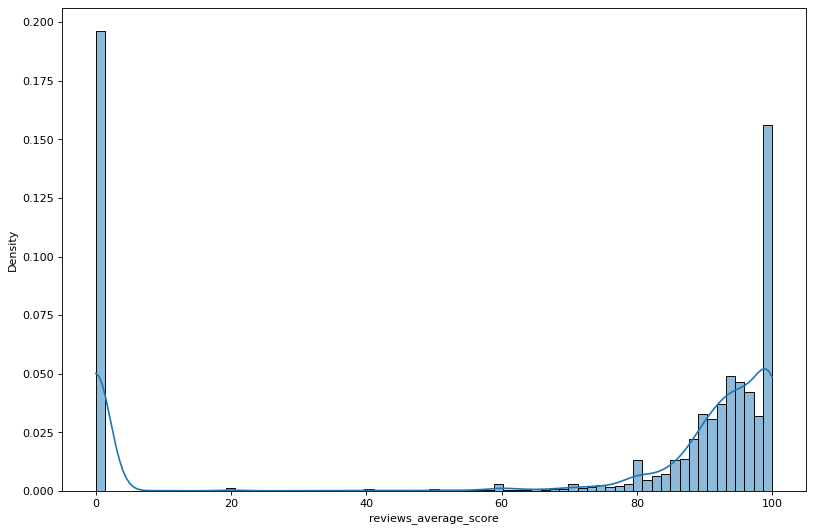

In [55]:
# some of the reviews are from an old eshop, that's why we can have higher than 0 score on product with 0 reviews
sns.histplot(data.reviews_average_score, kde=True, stat='density')
plt.show()

<AxesSubplot:ylabel='Density'>

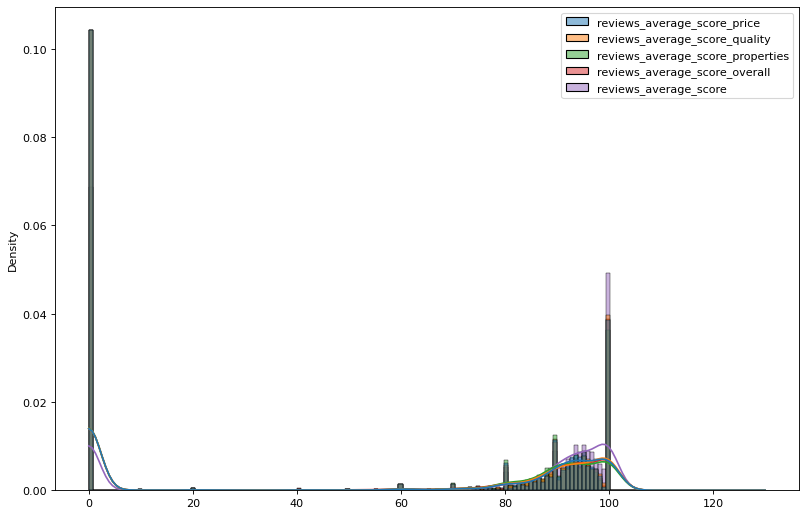

In [56]:
sns.histplot(data[['reviews_average_score_price', 'reviews_average_score_quality', 'reviews_average_score_properties', 'reviews_average_score_overall', 'reviews_average_score']], kde=True, stat='density')

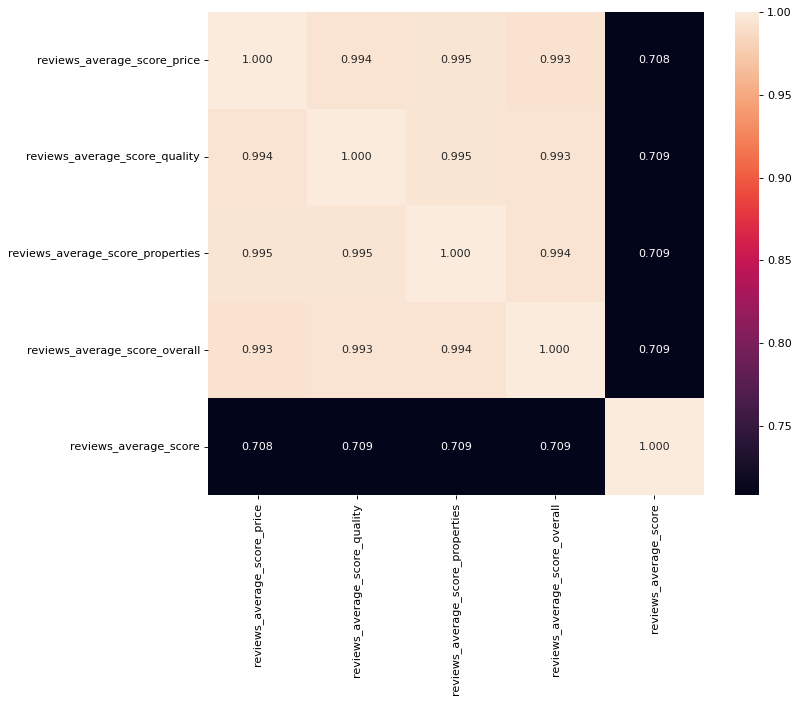

In [30]:
review_columns = [
 'reviews_average_score_price',
 'reviews_average_score_quality',
 'reviews_average_score_properties',
 'reviews_average_score_overall',
 'reviews_average_score']

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data[review_columns].corr(), ax=ax, annot=True, fmt=".3f")
plt.show()

review_columns.append('reviews_count')

In [31]:
TODO = list(data.columns)
TODO.remove('bill_country')
TODO.remove('brand_name')
TODO.remove('item_type')
TODO.remove('basket_type')
TODO.remove('original_currency_code')
TODO.remove('exchange_currency_rate')
[TODO.remove(i) for i in true_false_columns]
[TODO.remove(i) for i in review_columns]
TODO

['order_price_without_vat',
 'order_price_with_vat',
 'setting_currency_id',
 'created_at',
 'shop_basket_id',
 'doc_date',
 'basket_total_price_before_discount_with_vat',
 'basket_total_price_with_vat',
 'count_basket_items',
 'basket_count_products',
 'item_quantity',
 'item_unit_price_with_vat',
 'item_unit_price_without_vat',
 'item_total_discount_with_vat',
 'product_id',
 'product_code',
 'catalog_category_id',
 'catalog_brand_id',
 'product_name',
 'product_status',
 'product_purchase_price',
 'eshop_stock_count',
 'product_name_parameterize',
 'category',
 'tree_path',
 'category_name_parameterized',
 'category_status',
 'catalog_segment_id',
 'categories_ancestor_ids',
 'categories_descendant_ids',
 'category_full_name_path',
 'default_warranty_period',
 'brand_parameterized',
 'segment_name',
 'segment_parameterezied',
 'segment_status']

Median order price with vat 90.9 €
Mean order price with vat 267.72 €


<AxesSubplot:ylabel='Density'>

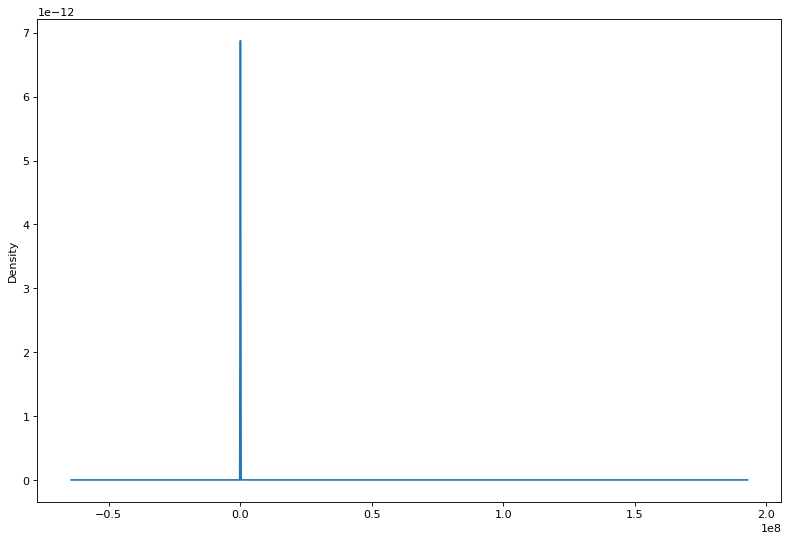

In [32]:
print(f'Median order price with vat {round(data.order_price_with_vat.median(), 2)} €')
print(f'Mean order price with vat {round(data.order_price_with_vat.mean(), 2)} €')
#sns.boxplot(data=data.order_price_with_vat)
data.order_price_with_vat.plot(kind='kde')

In [33]:
# calculate how many brands there are as well as the most common
print(data.brand_name.value_counts())

Fender                        130327
Dunlop                         90541
Soundking                      79003
Behringer                      60894
Yamaha                         50094
                               ...  
Solace                             1
Marracash                          1
Leo Kottke                         1
Guy Davis & Fabrizio Poggi         1
Benjamin Britten                   1
Name: brand_name, Length: 5259, dtype: int64


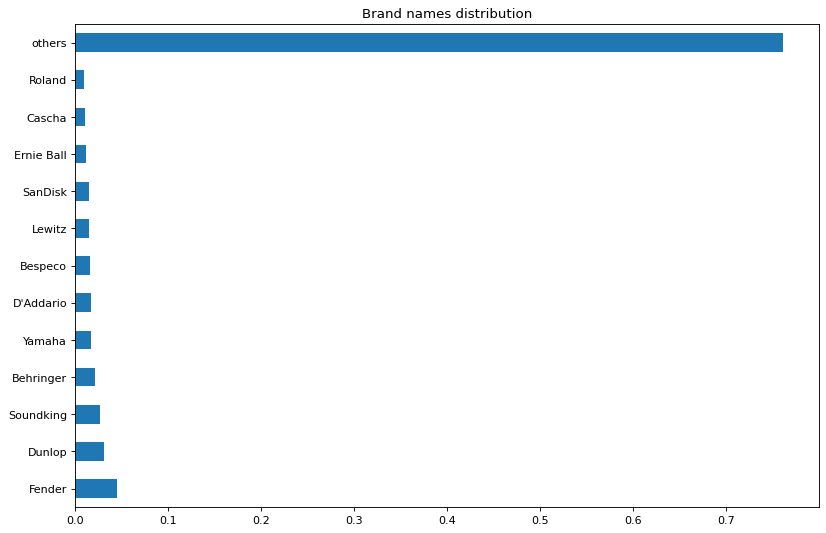

In [34]:
counted_countries = create_others_value_counts(0.01, data, 'brand_name') 
counted_countries.plot(kind='barh', title='Brand names distribution')
plt.show()

As we can see above, there is HUGE variety of brands in products (3185) with only 12 of them having more than 1% of products.

Percentage of bill countries, with the threshold of 0.5% to be shown as bill country of an order.

Bill countries in data: ['BG' 'CZ' 'DE' 'SK' 'HR' 'RO' 'SI' 'HU' 'PL' 'AT' 'FR' 'IT' 'GB' 'SE'
 'NL' 'IE' 'DK' 'ES' 'BE' 'LV' 'EE' 'PT' 'GR' 'FI' 'CH' 'LT' 'LU' 'EL'
 'TR' 'UA' 'RS' 'BA'].
 That is 32 countries as bill countries.


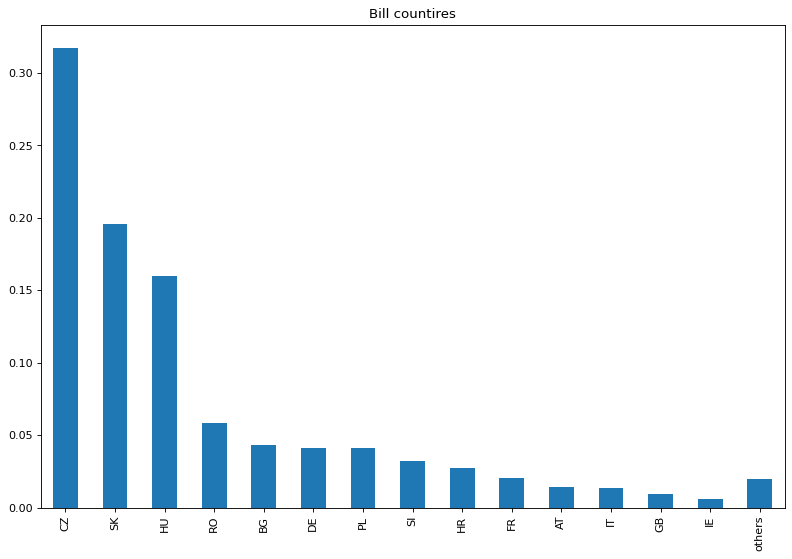

In [35]:
print(f'Bill countries in data: {data.bill_country.unique()}.\n That is {len(data.bill_country.unique())} countries as bill countries.')

figure().patch.set_facecolor('white')
counted_countries = create_others_value_counts(0.005, data, 'bill_country') 
counted_countries.plot(kind='bar', title='Bill countires')
plt.show()

In [36]:
"""
TODO preratat sumy na Eura vsade, zaokruhlit


"""

'\nTODO preratat sumy na Eura vsade, zaokruhlit\n\n\n'

In [37]:
"""
Poznamky

Kosiky sa pouzivaju len pri novom eshope. Na data o starom eshope pouzivam invoices - iba pre typ old eshop. To potom zlucujem dokopy.

"""

'\nPoznamky\n\nKosiky sa pouzivaju len pri novom eshope. Na data o starom eshope pouzivam invoices - iba pre typ old eshop. To potom zlucujem dokopy.\n\n'

In [38]:
x = {1,2,3,4,5}
x.add(5)
x.add(6)
x

{1, 2, 3, 4, 5, 6}